In [47]:
%matplotlib inline
from mylibs import perceptron as pt, adalinegd as agd, adalinesgd as asgd
import pandas as pd
import numpy as np
from sklearn import metrics as mt, preprocessing as pp
from sklearn.model_selection import StratifiedKFold, train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## 1.Desenhe o gráfico de região de decisão (plot_decision_regions) de cada um dos 3 algoritmos acima para os dados do dataset pima-indians-diabetes.csv.

    Veja exemplos de gráficos de região de decisão nos Jupyter Notebooks mencionados acima.
    Como o gráfico está limitado a 2 dimensões, sugiro a escolha das 2 features com maior correlação com o label (target).
        Use os dados das features standardizados. 

In [60]:
dados = pd.read_csv('datasets/pima-indians-diabetes.csv', header=None)
dados.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
dados.count()

0    768
1    768
2    768
3    768
4    768
5    768
6    768
7    768
8    768
dtype: int64

In [32]:
dados.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [63]:
y = dados.iloc[:, 8].values

X = dados.iloc[:, [1, 5]].values

X, y

(array([[148. ,  33.6],
        [ 85. ,  26.6],
        [183. ,  23.3],
        ...,
        [121. ,  26.2],
        [126. ,  30.1],
        [ 93. ,  30.4]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

std_scale = pp.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

# standardize
#X_std = np.copy(X)
#X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
#X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

## Adaline GD

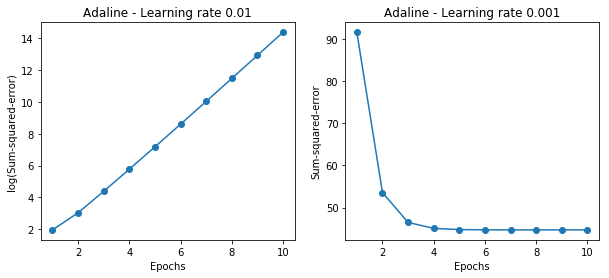

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = agd.AdalineGD(n_iter=10, eta=0.01).fit(X_train_std, y_train)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = agd.AdalineGD(n_iter=10, eta=0.001).fit(X_train_std, y_train)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.001')

plt.show()

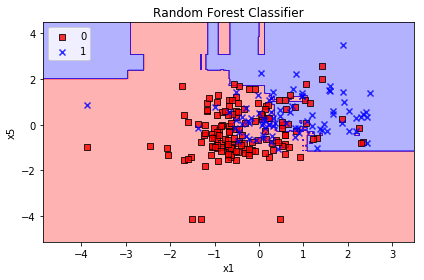

In [50]:
md_rfc = RandomForestClassifier(n_estimators=50, max_depth=5)
md_rfc.fit(X_train_std, y_train)
y_pred_rfc = md_rfc.predict(X_test_std)

agd.AdalineGD.plot_decision_regions(X_test_std, y_test, classifier=md_rfc)
plt.title('Random Forest Classifier')
plt.xlabel('x1')
plt.ylabel('x5')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#plt.plot(range(1, len(md_rfc.cost_) + 1), md_rfc.cost_, marker='o')
#plt.xlabel('Epochs')
#plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

In [52]:
acc_rf = mt.accuracy_score(y_test, y_pred_rfc)

acc_rf

0.7316017316017316

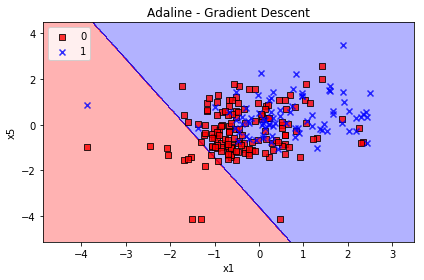

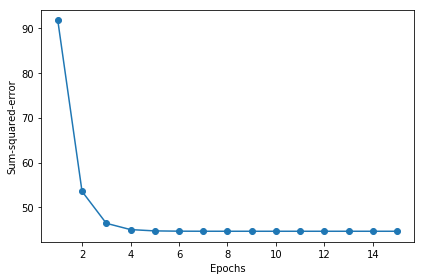

In [46]:
md_agd = agd.AdalineGD(n_iter=15, eta=0.001)
md_agd.fit(X_train_std, y_train)

agd.AdalineGD.plot_decision_regions(X_test_std, y_test, classifier=md_agd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('x1')
plt.ylabel('x5')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(md_agd.cost_) + 1), md_agd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

## Perceptron

In [59]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

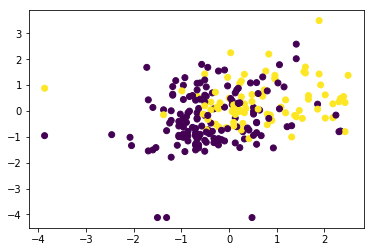

In [69]:
# plot data
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test)
plt.show()

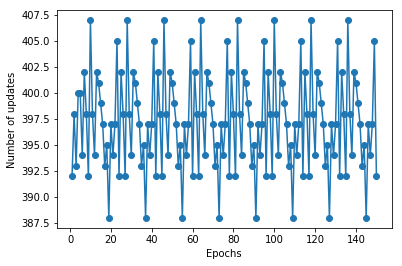

In [71]:
ppn = pt.Perceptron(eta=0.001, n_iter=150)

ppn.fit(X_train_std, y_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

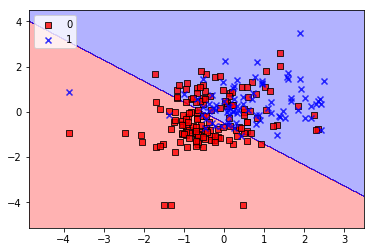

In [70]:
pt.Perceptron.plot_decision_regions(X_test_std, y_test, classifier=ppn)
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Adaline SGD

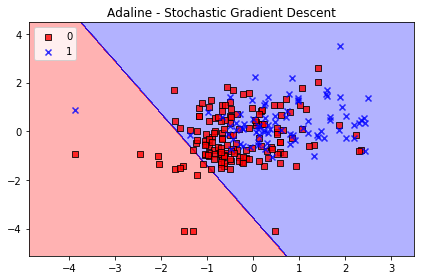

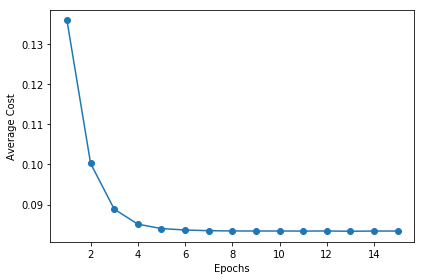

In [72]:
md_asgd = asgd.AdalineSGD(n_iter=15, eta=0.001, random_state=1).fit(X_train_std, y_train)

asgd.AdalineSGD.plot_decision_regions(X_test_std, y_test, classifier=md_asgd)
plt.title('Adaline - Stochastic Gradient Descent')
#plt.xlabel('sepal length [standardized]')
#plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(md_asgd.cost_) + 1), md_asgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

# Use K-Fold Cross Validation Estratificada com k = 3 para obter a acurácia dos 3 algoritmos acima sobre o dataset pima-indians-diabetes.csv. Faça Standardization dos dados (fit para o conjunto de treino e transform para treino e teste).

    Compare também com as implementações de Logistic Regression, kNN, Naive Bayes e SVM do Scikit-Learn.
    Ajuste os algoritmos através de seus hiper-parâmetros para obter os melhores resultados possíveis em cada algoritmo.

In [73]:
vt_lr_acc = []
vt_knn_acc = []
vt_nb_acc = []
vt_svm_acc = []
vt_adl_acc = []
vt_adgd_acc = []
vt_pct_acc = []

clf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
clf.get_n_splits()

for index_train, index_test in clf.split(X, y):
    X_train_, X_test_ = X[index_train], X[index_test]
    y_train_, y_test_ = y[index_train], y[index_test]
    
    std = pp.StandardScaler().fit(X_train_)
    X_train_std_ = std.transform(X_train_)
    X_test_std_ = std.transform(X_test_)
    
    #Adaline GD
    model_adl = agd.AdalineGD().fit(X_train_std_, y_train_)
    y_pred_adl = model_adl.predict(X_test_std_)
    vt_adl_acc.append(mt.accuracy_score(y_test_, y_pred_adl))
    
    #Adaline SGD
    model_adgd = asgd.AdalineSGD().fit(X_train_std_, y_train_)
    y_pred_adgd = model_adgd.predict(X_test_std_)
    vt_adgd_acc.append(mt.accuracy_score(y_test_, y_pred_adgd))
    
    #Perceptron
    model_pct = pt.Perceptron().fit(X_train_std_, y_train_)
    y_pred_pct = model_pct.predict(X_test_std_)
    vt_pct_acc.append(mt.accuracy_score(y_test_, y_pred_pct))
    
    #Logistic Regression
    model_lr = LogisticRegression().fit(X_train_std_, y_train_)
    y_pred_lr = model_lr.predict(X_test_std_)
    vt_lr_acc.append(mt.accuracy_score(y_test_, y_pred_lr))
    
    #kNN
    model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(X_train_std_, y_train_)
    y_pred_knn = model_knn.predict(X_test_std_)
    vt_knn_acc.append(mt.accuracy_score(y_test_, y_pred_knn))
    
    #Naive Bayes
    model_nb = GaussianNB().fit(X_train_std_, y_train_)
    y_pred_nb = model_nb.predict(X_test_std_)
    vt_nb_acc.append(mt.accuracy_score(y_test_, y_pred_nb))
    
    #SVM
    model_svm = SVC().fit(X_train_std_, y_train_)
    y_pred_svm = model_svm.predict(X_test_std_)
    vt_svm_acc.append(mt.accuracy_score(y_test_, y_pred_svm))

In [30]:
class_names = ['LR', 'kNN','NB','SVM']
class_1 = [vt_lr_acc, vt_knn_acc, vt_nb_acc, vt_svm_acc]

print('Accuracy Adaline GD = {}'.format(np.mean(vt_adl_acc)))
print('Accuracy Adaline SGD = {}'.format(np.mean(vt_adgd_acc)))
print('Accuracy Perceptron = {}'.format(np.mean(vt_pct_acc)))
print('--------------------------------------------------')
print('Accuracy Logistic Regression = {}'.format(np.mean(vt_lr_acc)))
print('Accuracy kNN = {}'.format(np.mean(vt_knn_acc)))
print('Accuracy Naive Bayes = {}'.format(np.mean(vt_nb_acc)))
print('Accuracy SVM = {}'.format(np.mean(vt_svm_acc)))

Accuracy Adaline GD = 0.09766749558124159
Accuracy Adaline SGD = 0.34634753058162304
Accuracy Perceptron = 0.2877635558925256
--------------------------------------------------
Accuracy Logistic Regression = 0.7395755647427583
Accuracy kNN = 0.7044442894700033
Accuracy Naive Bayes = 0.7421695189911244
Accuracy SVM = 0.7525964378131279


# Explique as diferenças entre o Adaline com Gradiente Descendente em Batch e o Adaline com Gradiente Descendente Estocástico.

O Adaline com Gradiente Descendente em Batch minimiza uma função de custo tomando uma etapa na direção oposta a um gradiente de custo calculado a partir de todo o conjunto de treino, tornando-o computacionalmente muito caro. O Adaline com Gradiente Descendente Estocástico alcança a convergência muito mais rapidamente devido às atualizações de peso mais frequentes. Cada gradiente é calculado com base em um único exemplo de treinamento.